In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
df = pd.read_csv('./advanced_housing.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df=df.drop(columns=['Id'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [8]:
df.corr()

/var/folders/86/jnxc9qfj6sv26myyt8z8355h0000gn/T/ipykernel_5448/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


/var/folders/86/jnxc9qfj6sv26myyt8z8355h0000gn/T/ipykernel_5448/2071813464.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['SalePrice'].sort_values().plot(kind='bar')


<AxesSubplot: >

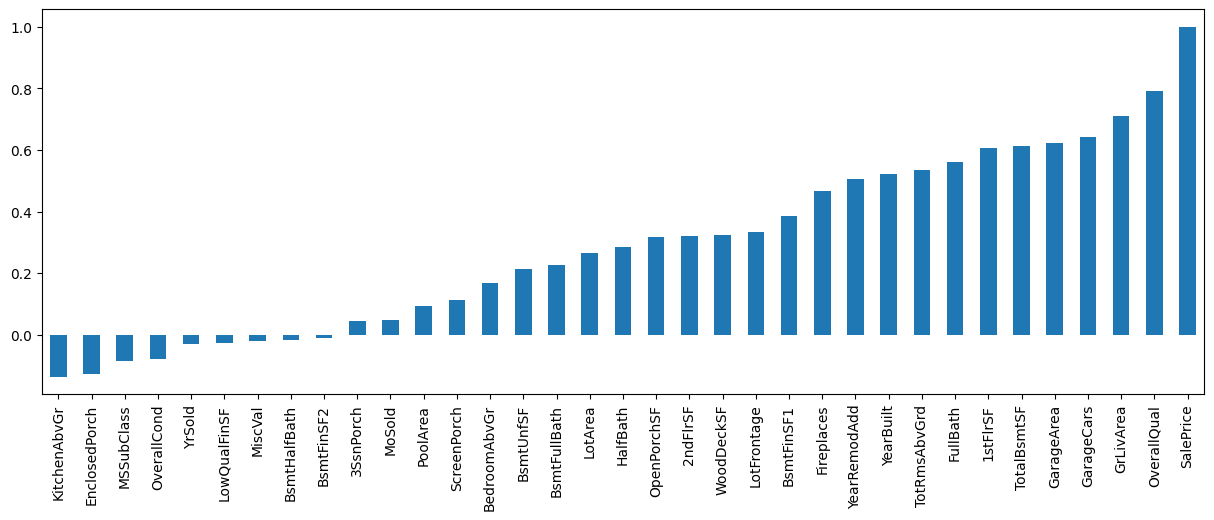

In [62]:
plt.figure(figsize=(15,5))
df.corr()['SalePrice'].sort_values().plot(kind='bar')

<AxesSubplot: >

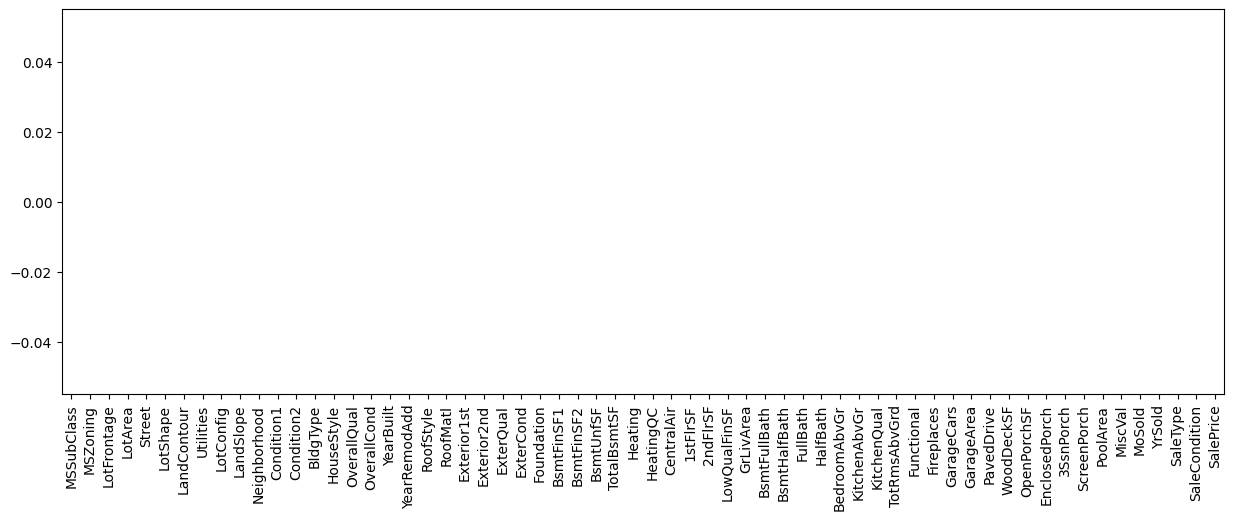

In [63]:
plt.figure(figsize=(15,5))
df.isnull().sum().plot(kind='bar')

In [64]:
df.isnull().sum().sort_values(ascending=False).head(20)

MSSubClass      0
Fireplaces      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Functional      0
GarageCars      0
MSZoning        0
GarageArea      0
PavedDrive      0
WoodDeckSF      0
dtype: int64

In [47]:
df.fillna(df.mean(),inplace=True)
df.drop(columns=['GarageYrBlt',
'GarageCond',
'GarageType',
'GarageFinish',
'GarageQual',
'BsmtExposure',
'BsmtFinType2',
'BsmtCond',
'BsmtQual',
'BsmtFinType1',
'MasVnrArea',
'MasVnrType',
'Electrical'],inplace=True)

/var/folders/86/jnxc9qfj6sv26myyt8z8355h0000gn/T/ipykernel_5448/3764117391.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(),inplace=True)


KeyError: "['GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 'BsmtExposure', 'BsmtFinType2', 'BsmtCond', 'BsmtQual', 'BsmtFinType1', 'MasVnrArea', 'MasVnrType', 'Electrical'] not found in axis"

/var/folders/86/jnxc9qfj6sv26myyt8z8355h0000gn/T/ipykernel_5448/474940758.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df=df.fillna(df.mean())


<AxesSubplot: >

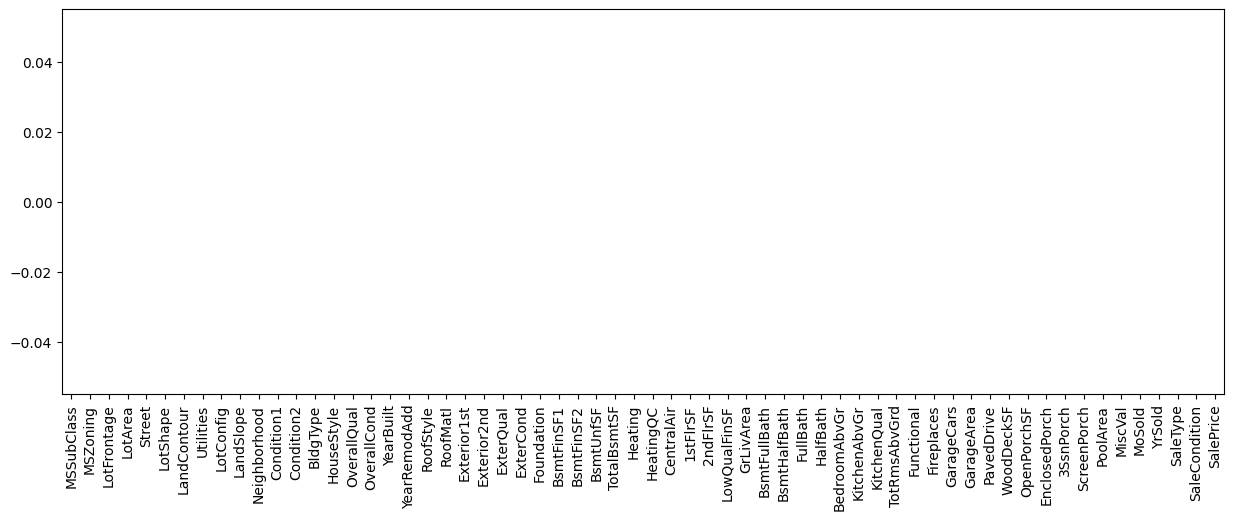

In [65]:
df=df.fillna(df.mean())

plt.figure(figsize=(15,5))
df.isnull().sum().plot(kind='bar')

In [58]:
df=df.drop(columns=['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'])


In [76]:
numeric_columns = df.select_dtypes(include=['number'])
# Drop non-numeric columns
df = df.drop(columns=df.select_dtypes(exclude=['number']).columns)

In [77]:
X = df.drop('SalePrice',axis=1).values
y=df['SalePrice'].values

Data Split

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [79]:
#Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [80]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [153]:
X_train.shape

(1168, 34)

In [154]:
del model
model=Sequential()
model.add(Dense(34,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(34,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(34,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [155]:
from tensorflow.keras.callbacks import EarlyStopping
ES = EarlyStopping(monitor='val_loss',mode='auto',verbose=1,patience=100)
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=128,epochs=400)


Epoch 1/400
10/10 [==============================] - 0s 11ms/step - loss: 39284629504.0000 - val_loss: 38057779200.0000
Epoch 2/400
10/10 [==============================] - 0s 3ms/step - loss: 39284490240.0000 - val_loss: 38057635840.0000
Epoch 3/400
10/10 [==============================] - 0s 3ms/step - loss: 39284314112.0000 - val_loss: 38057410560.0000
Epoch 4/400
10/10 [==============================] - 0s 4ms/step - loss: 39284011008.0000 - val_loss: 38056992768.0000
Epoch 5/400
10/10 [==============================] - 0s 3ms/step - loss: 39283453952.0000 - val_loss: 38056235008.0000
Epoch 6/400
10/10 [==============================] - 0s 4ms/step - loss: 39282442240.0000 - val_loss: 38054899712.0000
Epoch 7/400
10/10 [==============================] - 0s 4ms/step - loss: 39280779264.0000 - val_loss: 38052605952.0000
Epoch 8/400
10/10 [==============================] - 0s 4ms/step - loss: 39277813760.0000 - val_loss: 38048739328.0000
Epoch 9/400
10/10 [============================

<AxesSubplot: >

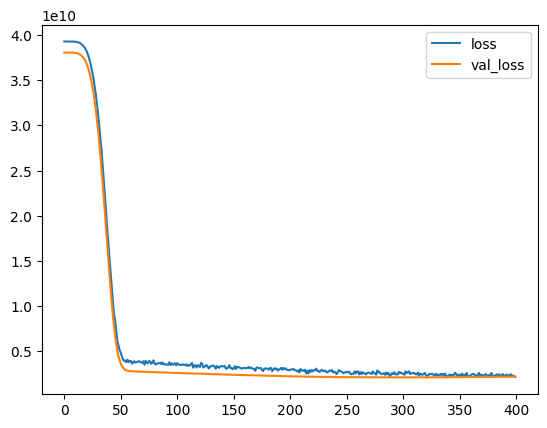

In [156]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [163]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
preds = model.predict(X_test)



10/10 [==============================] - 0s 705us/step


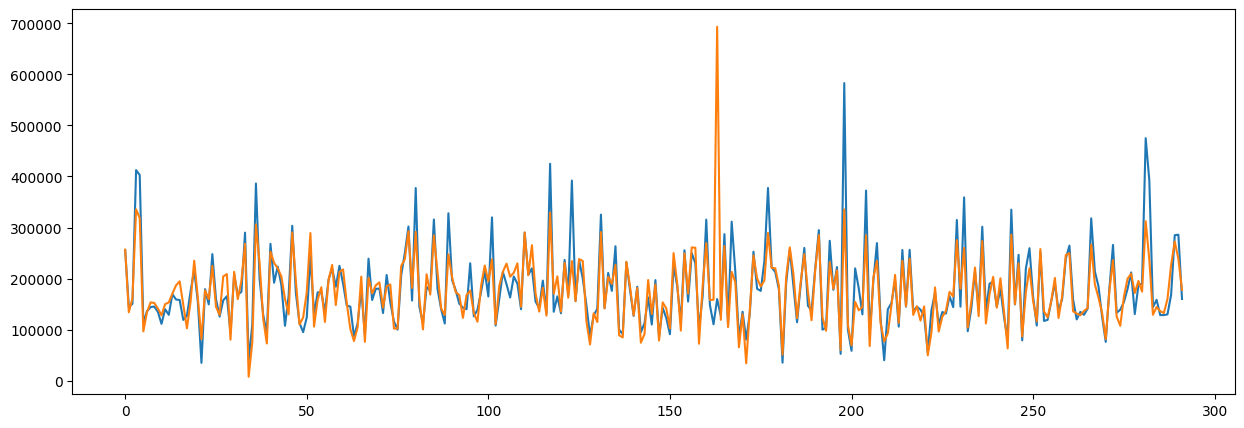

In [167]:
plt.figure(figsize=(15,5))
plt.plot(y_test)
plt.plot(preds)